In [122]:
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import os

# Q1


In [123]:
# Load dataset
path = os.path.join(os.getcwd(), 'W3/w3classif.csv')
w3classif = pd.read_csv(path, names=["X1", "X2", "Y"], header=None)

In [124]:
# TODO: create a function to create 10 different shuffled train and test set pairs from the original dataset
def create_train_test_data(test_size=0.3):
  # For storing data
  trains, tests = [], []

  for i in range(10):
    # TODO: Shuffle the dataset

    data = w3classif.sample(frac=1)

    # TODO: Split the dataset
    train_data, test_data = train_test_split(data, test_size=test_size)

    # Store data
    trains.append(train_data)
    tests.append(test_data)

  return trains, tests

# Q2

In [125]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np

In [126]:
# TODO: create a function to repeat classification with kNN for multiple trials

def repeat_knn(trials=10, test_size=0.3):

  # For storing
  train_losses, test_losses = [], []

  # Create train and test datasets (calling the function you created previously)
  trains, tests = create_train_test_data(test_size)

  for i in range(trials):

    # TODO: Split train data into features and target

    X_train = trains[i].drop("Y", axis=1)
    y_train = trains[i]["Y"]

    # TODO: Split test data into features and target

    X_test = tests[i].drop("Y", axis=1)
    y_test = tests[i]["Y"]

    # TODO: Initialize the k-NN classifier

    knn = KNeighborsClassifier(n_neighbors=3)

    # TODO: Train the classifier on the training data

    knn.fit(X_train, y_train)

    # TODO: Make predictions on the training and test data

    predict_train = knn.predict(X_train)
    predict_test = knn.predict(X_test)

    # TODO: Calculate training and test accuracy

    score_train = accuracy_score(y_train, predict_train)
    score_test = accuracy_score(y_test, predict_test)

    # TODO: Calculate training and test loss (misclassification rate)

    miss_train = 1 - score_train
    miss_test = 1 - score_test

    # TODO: Store train and test losses

    train_losses.append(miss_train)
    test_losses.append(miss_test)


  return train_losses, test_losses

In [127]:
# Print the average training and test losses for 10 trials using the function implemented above
train_losses, test_losses = repeat_knn(trials=10, test_size=0.3)
print(f'Avg Training Loss (Misclassification Rate): {np.array(train_losses).mean() * 100:.2f}%')
print(f'Avg Test Loss (Misclassification Rate): {np.array(test_losses).mean() * 100:.2f}%')

Avg Training Loss (Misclassification Rate): 2.39%
Avg Test Loss (Misclassification Rate): 5.17%


# Q3

In [ ]:
# TODO: Define all possible test set sizes
test_sizes = [(i + 0.001) / 100 if i == 0 else i / 100 for i in range(0, 100, 10)]

train_averages = list()
test_averages = list()

for ts in test_sizes:
  # TODO: Repeat Q1 and Q2 and print the average loss for 10 trials for each test set size
  train_losses, test_losses = repeat_knn(trials=10, test_size=ts)
  print(f'Test Size: {ts}')
  print(f'Avg Training Loss (Misclassification Rate): {np.array(train_losses).mean() * 100:.2f}%')
  print(f'Avg Test Loss (Misclassification Rate): {np.array(test_losses).mean() * 100:.2f}%')

  train_averages.append(np.array(train_losses).mean() * 100)
  test_averages.append(np.array(test_losses).mean() * 100)



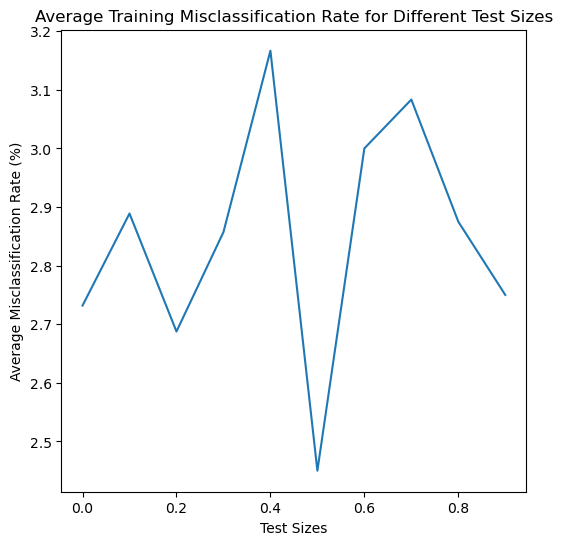

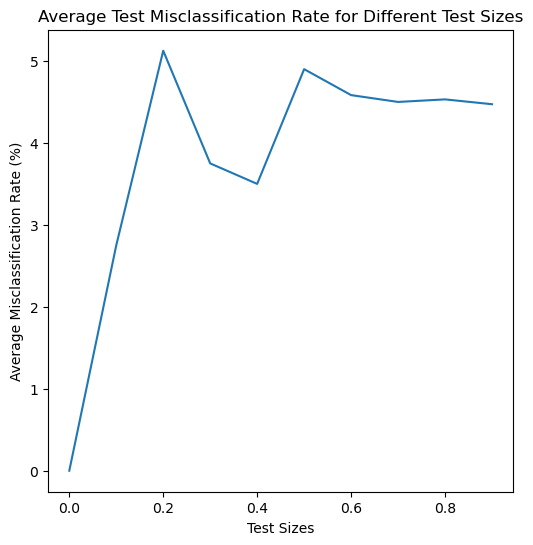

In [129]:
plt.figure(figsize=(6, 6))
plt.plot(test_sizes, train_averages)
plt.title('Average Training Misclassification Rate for Different Test Sizes')
plt.xlabel('Test Sizes')
plt.ylabel('Average Misclassification Rate (%)')
plt.show()

plt.figure(figsize=(6, 6))
plt.plot(test_sizes, test_averages)
plt.title('Average Test Misclassification Rate for Different Test Sizes')
plt.xlabel('Test Sizes')
plt.ylabel('Average Misclassification Rate (%)')
plt.show()

# Q4

In [ ]:
# TODO: Define all possible test set sizes
test_sizes = [(i + 0.001) / 100 if i == 0 else i / 100 for i in range(0, 100, 10)]

train_stds = list()
test_stds = list()

for ts in test_sizes:
  # TODO: Calculate the sample standard deviation of your training and test set error values over the 10 trials from Q2 and Q3.
  train_losses, test_losses = repeat_knn(trials=10, test_size=ts)
  print(f'Test Size: {ts}')
  print(f'Training Loss Standard Deviation (Misclassification Rate): {np.array(train_losses).std():.5f}')
  print(f'Test Loss Standard Deviation (Misclassification Rate): {np.array(test_losses).std():.5f}')

  train_stds.append(np.array(train_losses).std())
  test_stds.append(np.array(test_losses).std())

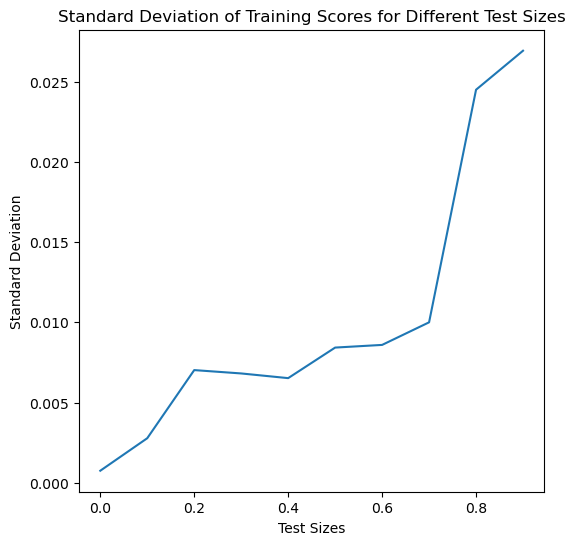

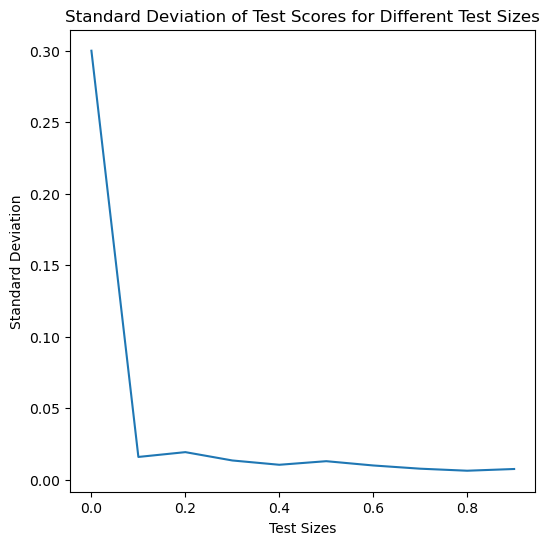

In [131]:
plt.figure(figsize=(6, 6))
plt.plot(test_sizes, train_stds)
plt.title('Standard Deviation of Training Scores for Different Test Sizes')
plt.xlabel('Test Sizes')
plt.ylabel('Standard Deviation')
plt.show()

plt.figure(figsize=(6, 6))
plt.plot(test_sizes, test_stds)
plt.title('Standard Deviation of Test Scores for Different Test Sizes')
plt.xlabel('Test Sizes')
plt.ylabel('Standard Deviation')
plt.show()

# Q5

In [132]:
from sklearn.model_selection import cross_val_score

# TODO: Shuffle the original dataset

data = w3classif.sample(frac=1)

# TODO: Split the dataset into features and target

X = data.drop("Y", axis=1)
y = data["Y"]

# TODO: Initialize the k-NN classifier

knn = KNeighborsClassifier(n_neighbors=3)

# TODO: Define the number of folds for cross-validation
num_folds = 10

# TODO: Perform cross-validation

scores = 1 - cross_val_score(knn, X, y, cv=num_folds)

# TODO: Calculate mean and standard deviation of cross-validation error

mean_score = scores.mean()
std_score = scores.std()

# TODO: Print the errors

print(f'Average Cross Validation Error (Misclassification Rate): {mean_score * 100:.2f}%')
print(f'Cross Validation Error Standard Deviation: {std_score:.5f}')

Average Cross Validation Error (Misclassification Rate): 4.50%
Cross Validation Error Standard Deviation: 0.03841
